<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 162.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.1 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
df.isnull().sum()


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [41]:
employ_unique = df['Employment'].unique().tolist()

print(len(employ_unique))

110


In [5]:
## Write your code here
employ_vc = df['Employment'].value_counts().sort_values(ascending=False)

employ_vc[:10]

Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Employed, part-time                                                          1266
Student, full-time;Employed, part-time                                       1115
Employed, full-time;Student, full-time                                        897
Employed, full-time;Student, part-time                                        839
Student, full-time;Not employed, but looking for work                         686
Name: count, dtype: int64

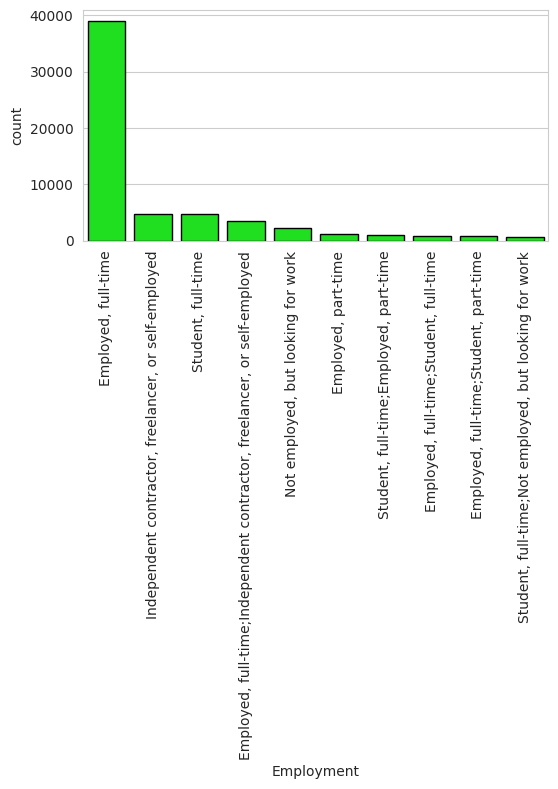

In [42]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(6,3))
sns.barplot(employ_vc[:10], edgecolor='black', 
            color='lime')
plt.xticks(rotation=90)
plt.show()

In [51]:
top_employments = employ_vc[:10].index.tolist()

df_subset_employ = \
df.loc[df['Employment'].isin(top_employments)]

df_subset_employ.shape

(59297, 114)

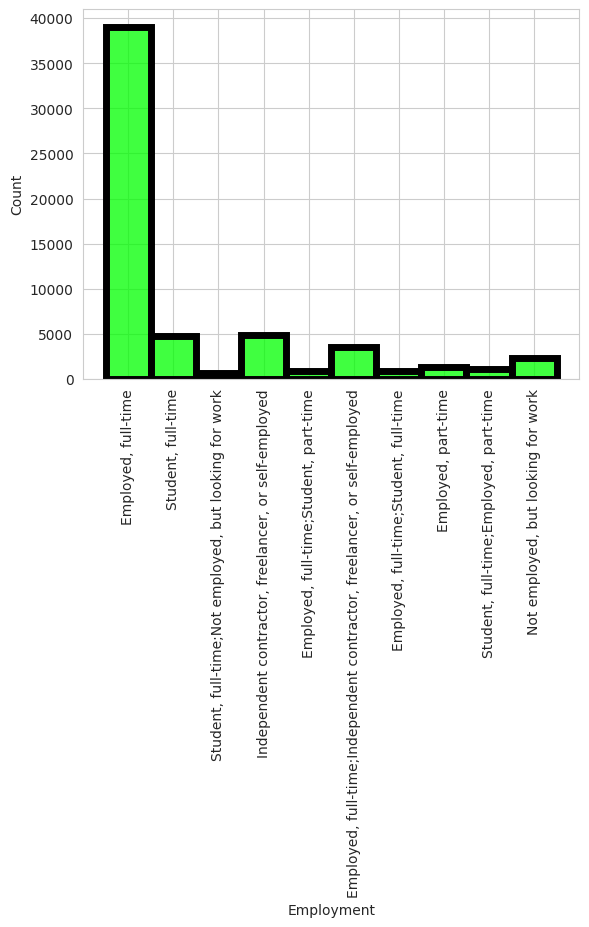

In [59]:

sns.histplot(df_subset_employ['Employment'], edgecolor='black', linewidth=5,
            color='lime')
plt.xticks(rotation=90)
plt.show()

    

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [7]:
JobSat_vc = df['JobSat'].value_counts().sort_values(ascending=False)

JobSat_vc

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

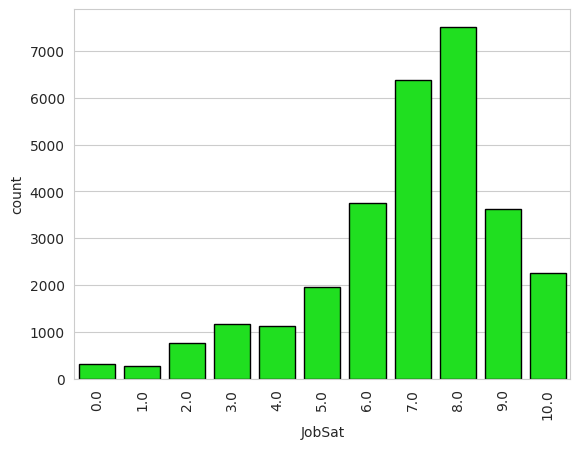

In [8]:
sns.barplot(JobSat_vc,  edgecolor='black', 
            color='lime')
plt.xticks(rotation=90)
plt.show()

In [9]:
df['JobSat'].dtype
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

df['JobSat'].describe()

count    65437.000000
mean         7.525987
std          1.490331
min          0.000000
25%          8.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

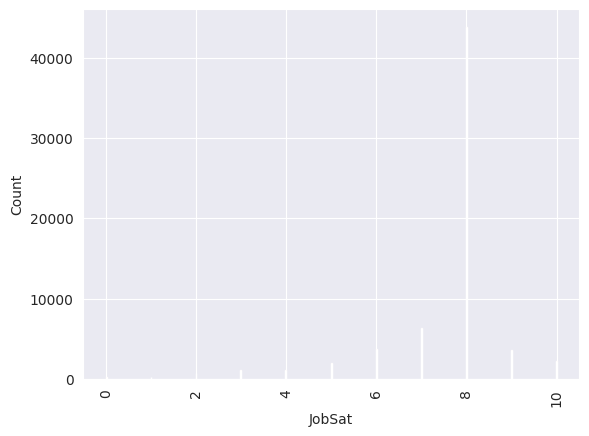

In [10]:

sns.set_style('darkgrid')
sns.histplot(df['JobSat'], color='red', linewidth=1)

plt.xticks(rotation=90)
plt.show()

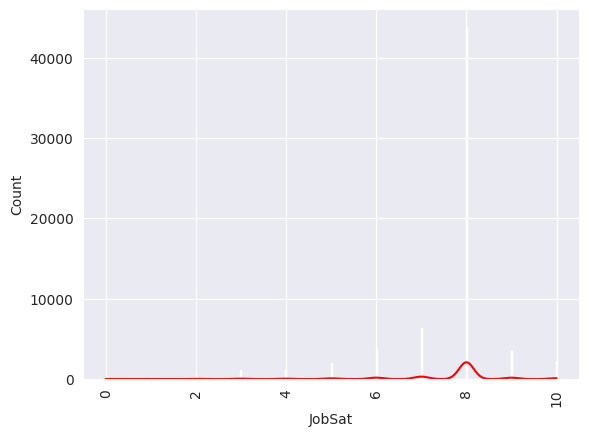

In [11]:
## Write your code here


sns.set_style('darkgrid')
sns.histplot(df['JobSat'], color='red', linewidth=1, kde=True)

plt.xticks(rotation=90)
plt.show()

In [12]:
countries_list = df['Country'].unique().tolist()

countries_subset = \
['United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
 'Canada',
 'Norway',
 'Uzbekistan',
 'Serbia',
 'Poland',
 'Philippines',
 'Bulgaria',
 'Switzerland']

In [13]:
df_countries_subset = \
df.loc[df['Country'].isin( countries_subset), :]

print(df_countries_subset.shape)

(20105, 114)


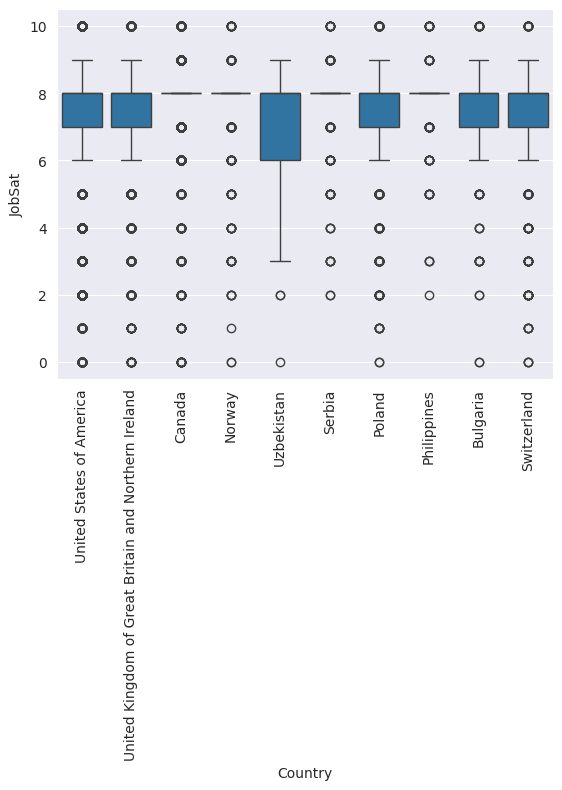

In [14]:
sns.boxplot(df_countries_subset, x='Country', y='JobSat')
plt.xticks(rotation=90)
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [15]:
## Write your code here

lang_worked_vc = \
df['LanguageHaveWorkedWith'].value_counts().sort_values(ascending=False)

lang_worked_vc_topten = \
df['LanguageHaveWorkedWith'].value_counts().sort_values(ascending=False)[:10]

lang_worked_vc_topten

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript           1002
Python                                    832
HTML/CSS;JavaScript;PHP;SQL               503
C#                                        452
HTML/CSS;JavaScript                       452
Python;SQL                                441
Java                                      424
C#;HTML/CSS;JavaScript;SQL;TypeScript     408
JavaScript;TypeScript                     402
C#;HTML/CSS;JavaScript;SQL                357
Name: count, dtype: int64

In [16]:
lang_worked_topten_names = lang_worked_vc_topten.index.tolist()
lang_worked_topten_names 

['HTML/CSS;JavaScript;TypeScript',
 'Python',
 'HTML/CSS;JavaScript;PHP;SQL',
 'C#',
 'HTML/CSS;JavaScript',
 'Python;SQL',
 'Java',
 'C#;HTML/CSS;JavaScript;SQL;TypeScript',
 'JavaScript;TypeScript',
 'C#;HTML/CSS;JavaScript;SQL']

In [17]:
lang_worked_subset_df = \
df.loc[df['LanguageHaveWorkedWith'].isin(lang_worked_topten_names)]


lang_worked_subset_df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript           1002
Python                                    832
HTML/CSS;JavaScript;PHP;SQL               503
C#                                        452
HTML/CSS;JavaScript                       452
Python;SQL                                441
Java                                      424
C#;HTML/CSS;JavaScript;SQL;TypeScript     408
JavaScript;TypeScript                     402
C#;HTML/CSS;JavaScript;SQL                357
Name: count, dtype: int64

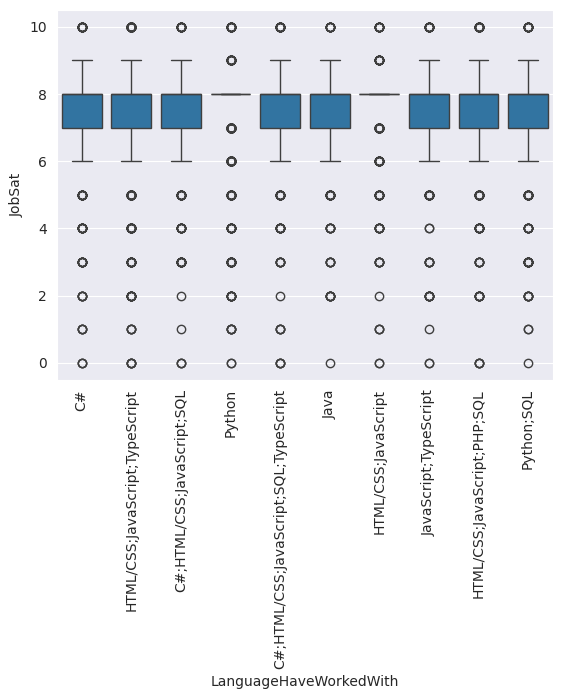

In [18]:
sns.boxplot(lang_worked_subset_df, x='LanguageHaveWorkedWith', y='JobSat')
plt.xticks(rotation=90)
plt.show()

In [19]:
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           65437 non-null  int64  
 1   CompTotal            33740 non-null  float64
 2   WorkExp              29658 non-null  float64
 3   JobSatPoints_1       29324 non-null  float64
 4   JobSatPoints_4       29393 non-null  float64
 5   JobSatPoints_5       29411 non-null  float64
 6   JobSatPoints_6       29450 non-null  float64
 7   JobSatPoints_7       29448 non-null  float64
 8   JobSatPoints_8       29456 non-null  float64
 9   JobSatPoints_9       29456 non-null  float64
 10  JobSatPoints_10      29450 non-null  float64
 11  JobSatPoints_11      29445 non-null  float64
 12  ConvertedCompYearly  23435 non-null  float64
 13  JobSat               65437 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 7.0 MB


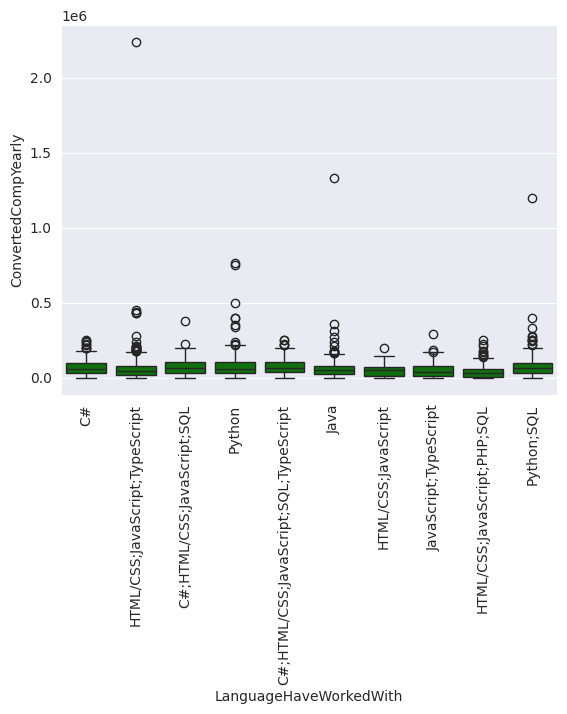

In [20]:
sns.boxplot(lang_worked_subset_df, x='LanguageHaveWorkedWith', y='ConvertedCompYearly', color='green')
plt.xticks(rotation=90)
plt.show()

### Step 7: Analyze Remote Work Trends

- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [21]:
## Write your code here
## Write your code here
rw_types = df['RemoteWork'].unique().tolist()

rw_types

['Remote', nan, 'In-person', 'Hybrid (some remote, some in-person)']

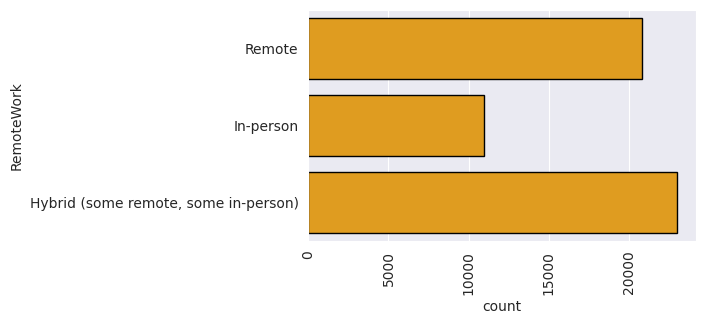

In [22]:
fig = plt.figure(figsize=(5,3))
sns.countplot(df['RemoteWork'], edgecolor='black', color='orange')
plt.xticks(rotation=90)
plt.show()

In [23]:
topten_remotework_countries = \
pd.DataFrame(df.groupby('Country')['RemoteWork'].count().sort_values(ascending=False)[:10])

topten_remotework_countries

,RemoteWork
Country,
United States of America,9438
Germany,4270
India,3137
United Kingdom of Great Britain and Northern Ireland,2747
Ukraine,2336
France,1807
Canada,1765
Poland,1306
Netherlands,1250


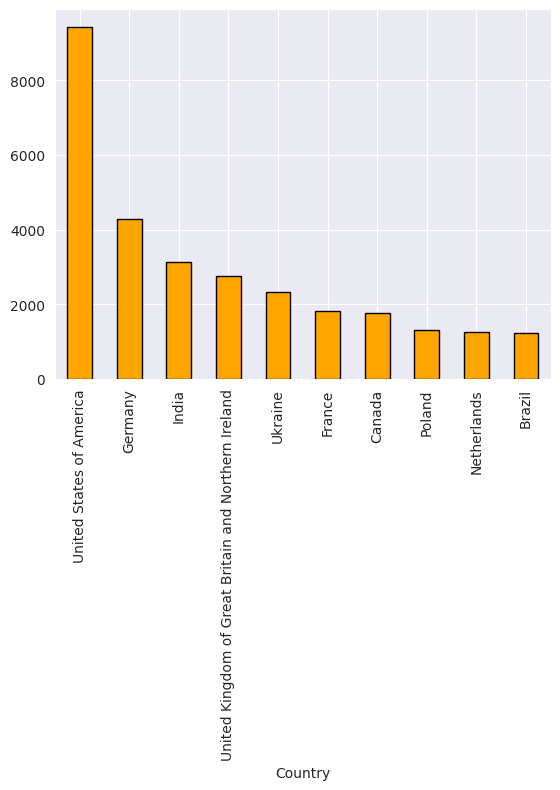

In [24]:
topten_remotework_countries.plot.bar(edgecolor='black', color='orange', legend=False)
plt.xticks(rotation=90)
plt.show()

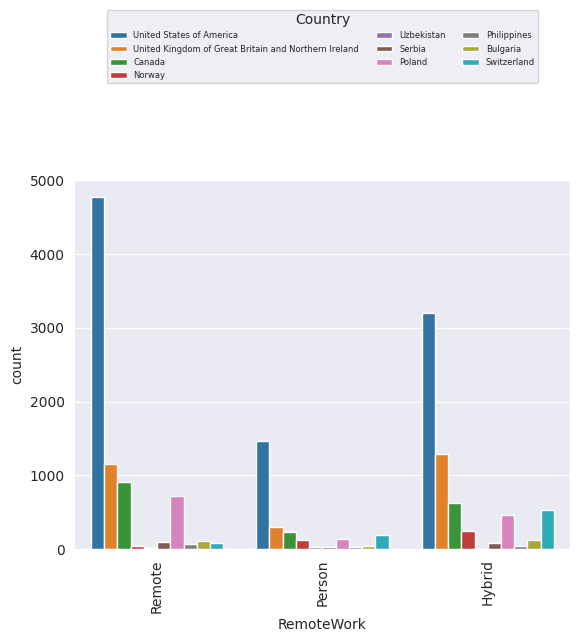

In [25]:
sns.countplot(df_countries_subset, x='RemoteWork', hue='Country')
plt.xticks(rotation=90, ticks=[0,1,2], labels=['Remote', 'Person', 'Hybrid' ])

plt.legend(
    title='Country',          # Legend title (optional)
    bbox_to_anchor=(0.5, 1.25),  # (x, y) coordinates (0.5 centers it)
    loc='lower center',       # Position relative to bbox_to_anchor
    ncol=3 ,                   # Number of columns (adjust as needed)
    fontsize=6
)

# plt.tight_layout()  # Prevents legend from being cut off
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [26]:
df['JobSat'].dtype

dtype('float64')

In [27]:
df['YearsCodePro'].dtype

dtype('O')

In [28]:
df['YearsCodePro'].unique().tolist()

[nan,
 '17',
 '27',
 '7',
 '11',
 '25',
 '12',
 '10',
 '3',
 'Less than 1 year',
 '18',
 '37',
 '15',
 '20',
 '6',
 '2',
 '16',
 '8',
 '14',
 '4',
 '45',
 '1',
 '24',
 '29',
 '5',
 '30',
 '26',
 '9',
 '33',
 '13',
 '35',
 '23',
 '22',
 '31',
 '19',
 '21',
 '28',
 '34',
 '32',
 '40',
 '50',
 '39',
 '44',
 '42',
 '41',
 '36',
 '38',
 'More than 50 years',
 '43',
 '47',
 '48',
 '46',
 '49']

In [35]:
df['YearsCodePro']= \
df['YearsCodePro'].replace({'More than 50 years': '55', 'Less than 1 year':'0'})

df['YearsCodePro'] = \
df['YearsCodePro'].fillna(value=df['YearsCodePro'].mode()[0])

df['YearsCodePro'] = \
df['YearsCodePro'].astype(float)

df['YearsCodePro'].unique().tolist()

[2.0,
 17.0,
 27.0,
 7.0,
 11.0,
 25.0,
 12.0,
 10.0,
 3.0,
 0.0,
 18.0,
 37.0,
 15.0,
 20.0,
 6.0,
 16.0,
 8.0,
 14.0,
 4.0,
 45.0,
 1.0,
 24.0,
 29.0,
 5.0,
 30.0,
 26.0,
 9.0,
 33.0,
 13.0,
 35.0,
 23.0,
 22.0,
 31.0,
 19.0,
 21.0,
 28.0,
 34.0,
 32.0,
 40.0,
 50.0,
 39.0,
 44.0,
 42.0,
 41.0,
 36.0,
 38.0,
 55.0,
 43.0,
 47.0,
 48.0,
 46.0,
 49.0]

In [36]:
## Write your code here

df[['JobSat', 'YearsCodePro']].corr(method='pearson')

,JobSat,YearsCodePro
JobSat,1.000000,0.006336
YearsCodePro,0.006336,1.000000


In [37]:
df[['JobSat', 'YearsCodePro']].corr(method='spearman')

,JobSat,YearsCodePro
JobSat,1.000000,-0.031575
YearsCodePro,-0.031575,1.000000


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [70]:
## Write your code here

# df_subset_employ['Employment']
# df_subset_employ['EdLevel'].unique().tolist()
df_subset_employ.loc[:, 'EdLevel'] = df_subset_employ.loc[:, 'EdLevel'].fillna(value=df_subset_employ['EdLevel'].mode()[0])

crosstable = \
pd.crosstab(df_subset_employ['Employment'], df_subset_employ['EdLevel'])

crosstable

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",1059,19322,11011,160,2073,1460,3579,377
"Employed, full-time;Independent contractor, freelancer, or self-employed",104,1592,963,25,159,181,492,41
"Employed, full-time;Student, full-time",30,397,172,4,29,106,152,7
"Employed, full-time;Student, part-time",36,392,155,2,22,58,164,10
"Employed, part-time",39,518,322,26,83,112,141,25
"Independent contractor, freelancer, or self-employed",143,1904,1341,57,239,367,728,67
"Not employed, but looking for work",74,1197,387,51,64,200,317,51
"Student, full-time",81,1383,239,417,37,1716,729,107
"Student, full-time;Employed, part-time",30,421,75,26,7,299,247,10


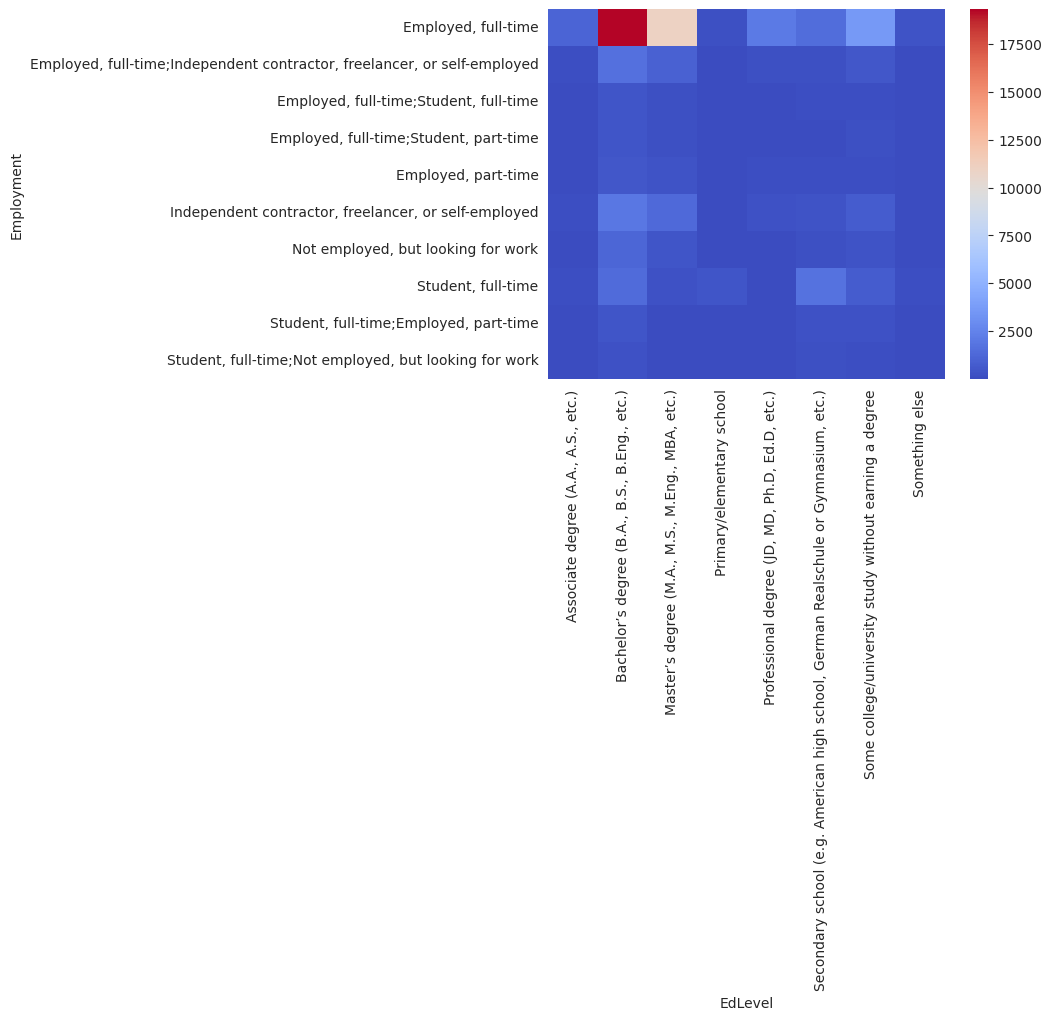

In [78]:
sns.heatmap(crosstable, cmap='coolwarm', annot=False)

plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

df_subset_employ.to_csv("df_subset_employ")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
